In [1]:
# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import the libraries to handle the np array, pandas dataframe, and visualiztion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import prepare.py to prepare the dataset
import prepare, explore

import psutil
from tqdm.notebook import tqdm

### Acquire and Prepare the data for Exploration

In [79]:
# Define the data types
dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16", 
    "content_type_id": "boolean", 
    "task_container_id": "int16",
    "user_answer": "int8", 
    "answered_correctly": "int8", 
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"    
}

# Acquire the history of the users in the test dataset
df_train = pd.read_csv('users_history_test.csv', index_col=0, dtype=dtypes)

# Load the questions.csv with tag_counts
df_ques = pd.read_csv('questions_with_tag_counts.csv', index_col=0)

# Load the lectures.csv with part_name
df_lects = pd.read_csv('lectures_with_part_name.csv', index_col=0)

# Print the shape of the datasets
df_train.shape, df_ques.shape, df_lects.shape

((72719, 10), (13523, 6), (418, 5))

In [80]:
# Inpsect the train dataset
df_train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,25924315,0,554169193,3927,False,0,1,1,NaN,<NA>
1,25924316,24904,554169193,939,False,1,0,1,23000.0,False
2,25924317,59273,554169193,6683,False,2,1,0,19000.0,False
3,25924318,95917,554169193,5658,False,3,3,1,30000.0,False
4,25924319,112132,554169193,6202,False,4,2,1,31000.0,False


In [81]:
# Quick summary of train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72719 entries, 0 to 72718
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   row_id                          72719 non-null  int64  
 1   timestamp                       72719 non-null  int64  
 2   user_id                         72719 non-null  int32  
 3   content_id                      72719 non-null  int16  
 4   content_type_id                 72719 non-null  boolean
 5   task_container_id               72719 non-null  int16  
 6   user_answer                     72719 non-null  int8   
 7   answered_correctly              72719 non-null  int8   
 8   prior_question_elapsed_time     71286 non-null  float32
 9   prior_question_had_explanation  72678 non-null  boolean
dtypes: boolean(2), float32(1), int16(2), int32(1), int64(2), int8(2)
memory usage: 2.9 MB


In [82]:
# Drop column content_type_id and user_answer in the df_train
df_train.drop(columns=['content_type_id', 'user_answer'], inplace=True)

## Explore df_ques dataframe

In [88]:
# Print the shape of the df_ques
print(f"df_ques has {df_ques.shape[0]} rows")
print(f"df_ques has {df_ques.shape[1]} columns")

# Inspect the df_ques
df_ques.head()

df_ques has 13523 rows
df_ques has 6 columns


,question_id,bundle_id,correct_answer,part,tags,tag_count
0,0,0,0,1,51 131 162 38,4
1,1,1,1,1,131 36 81,3
2,2,2,0,1,131 101 162 92,4
3,3,3,0,1,131 149 162 29,4
4,4,4,3,1,131 5 162 38,4


### How many unique Questions, Bundles, Tags, Parts and Tag_Count in the df_ques?

In [89]:
cols = df_ques.columns

for col in tqdm(cols):
    print(f'Column {col} has {df_ques[col].nunique()} unique values.')

Column question_id has 13523 unique values.
Column bundle_id has 9765 unique values.
Column correct_answer has 4 unique values.
Column part has 7 unique values.
Column tags has 1519 unique values.
Column tag_count has 7 unique values.



In [90]:
# Drop the column `correct_answer` in df_ques
# Because `correct_answer` is used to determine if the user answers an question correctly

df_ques.drop(columns=['correct_answer'], inplace=True)

## Explore `df_lects` dataframe

In [91]:
# Print the shape of the df_ques
print(f"df_lects has {df_lects.shape[0]} rows")
print(f"df_lects has {df_lects.shape[1]} columns")

# Inspect the df_ques
df_lects.head()

df_lects has 418 rows
df_lects has 5 columns


,lecture_id,tag,part,type_of,part_content
0,89,159,5,concept,Incomplete Sentences
1,100,70,1,concept,Photographs
2,185,45,6,concept,Text Completion
3,192,79,5,solving question,Incomplete Sentences
4,317,156,5,solving question,Incomplete Sentences


In [92]:
cols = df_lects.columns

for col in tqdm(cols):
    print(f'Column {col} has {df_lects[col].nunique()} unique values.')

Column lecture_id has 418 unique values.
Column tag has 151 unique values.
Column part has 7 unique values.
Column type_of has 4 unique values.
Column part_content has 7 unique values.



In [93]:
# Drop column `part` in the df_lects
df_lects.drop(columns=['part'], inplace=True)

## Merge users' history with `df_ques` and `df_lects`

In [94]:
# Merge the users' history with the df_ques
df = df_train.merge(df_ques, how='left', left_on='content_id', right_on='question_id')

# Merge the new dataframe df with df_lects
df = df.merge(df_lects, how='left', left_on='content_id', right_on='lecture_id')

# Print the first 5 rows of the new dataframe
df.head()

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,lecture_id,tag,type_of,part_content
0,25924315,0,554169193,3927,0,1,NaN,<NA>,3927.0,3927.0,5.0,79,1.0,NaN,NaN,NaN,NaN
1,25924316,24904,554169193,939,1,1,23000.0,False,939.0,939.0,2.0,2 62 56 162 38 81,6.0,NaN,NaN,NaN,NaN
2,25924317,59273,554169193,6683,2,0,19000.0,False,6683.0,6683.0,5.0,1,1.0,NaN,NaN,NaN,NaN
3,25924318,95917,554169193,5658,3,1,30000.0,False,5658.0,5658.0,5.0,26,1.0,NaN,NaN,NaN,NaN
4,25924319,112132,554169193,6202,4,1,31000.0,False,6202.0,6202.0,5.0,8,1.0,NaN,NaN,NaN,NaN


### How many users in the dataset?

In [95]:
# Print how many users in the dataset
print("The number of users in the dataset: ", df.user_id.nunique())

# Print the user ids
user_ids = df.user_id.unique()
print("The user ids are shown below:\n", user_ids)

The number of users in the dataset:  41
The user ids are shown below:
 [ 554169193 1720860329  288641214 1728340777 1364159702 1521618396
 1317245193 1700555100  998511398 1422853669 1096784725  385471210
 1202386221 2018567473 1233875513  891955351 1981166446 1637273633
 2030979309  319060572   98059812  674533997  555691277  775113212
 1219481379 1148874033 1281335472 2002570769  706626847 1357500007
 1599808246 1305988022 1310228392 2093197291 1468996389 1838324752
 2103436554  311890082 1817433235 1900527744    7792299]


### What does a user's record look like? 
- Take user 554169193 for example

In [96]:
# Acquire the records of user 554169193
mask = (df.user_id == 554169193)
user9193 = df[mask]

# Compute how many interactions the user has
print("The number of interactions user 554169193 has: ", user9193.shape[0])

# Print the user's record
user9193

The number of interactions user 554169193 has:  5359


,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,lecture_id,tag,type_of,part_content
0,25924315,0,554169193,3927,0,1,NaN,<NA>,3927.0,3927.0,5.0,79,1.0,NaN,NaN,NaN,NaN
1,25924316,24904,554169193,939,1,1,23000.0,False,939.0,939.0,2.0,2 62 56 162 38 81,6.0,NaN,NaN,NaN,NaN
2,25924317,59273,554169193,6683,2,0,19000.0,False,6683.0,6683.0,5.0,1,1.0,NaN,NaN,NaN,NaN
3,25924318,95917,554169193,5658,3,1,30000.0,False,5658.0,5658.0,5.0,26,1.0,NaN,NaN,NaN,NaN
4,25924319,112132,554169193,6202,4,1,31000.0,False,6202.0,6202.0,5.0,8,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,25929669,13134944873,554169193,13469,4417,1,19000.0,True,13469.0,13469.0,5.0,14,1.0,NaN,NaN,NaN,NaN
5355,25929670,13134970085,554169193,13307,4418,1,6000.0,True,13307.0,13307.0,5.0,79,1.0,NaN,NaN,NaN,NaN
5356,25929671,13309652232,554169193,12256,4419,0,9000.0,True,12256.0,12256.0,2.0,90 100 92 29,4.0,NaN,NaN,NaN,NaN
5357,25929672,13309683400,554169193,1074,4420,0,40000.0,True,1074.0,1074.0,2.0,138 41 38 81,4.0,NaN,NaN,NaN,NaN


**Takeaways**
1. The task_container_id seems to increase as the timestampe increases.
2. The user doesn't start with PART 5, rather than PART 1. 

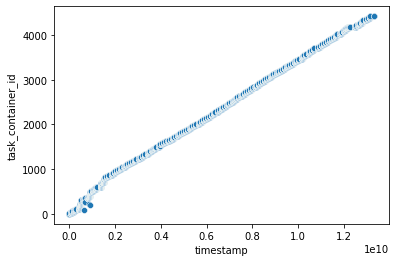

In [97]:
# Plot the how the task_container_id changes over time
sns.scatterplot(data=user9193, x='timestamp', y='task_container_id')
plt.show()

**Takeaways**: The task_container_id has a strong linear relationship with timestamp in user9193's record.

In [98]:
user9193.part.value_counts(normalize=True)

5.0    0.421403
2.0    0.303745
6.0    0.095989
4.0    0.093518
3.0    0.069378
1.0    0.015206
7.0    0.000760
Name: part, dtype: float64

### What are we going to predict about user9193? 

In [99]:
# Read the example_test.csv dataset
df_test = pd.read_csv("data_allusers/example_test.csv")

# Acquire the record of user9193 from df_test
mask = (df_test.user_id == 554169193)
user9193_test = df_test[mask]

# Print the user's record needs to be predicted
user9193_test

,row_id,group_num,timestamp,user_id,content_id,content_type_id,task_container_id,prior_question_elapsed_time,prior_question_had_explanation,prior_group_answers_correct,prior_group_responses
1,1,0,13309898705,554169193,12010,0,4427,19000.0,True,NaN,NaN
48,49,2,13309942648,554169193,1260,0,4428,18000.0,True,NaN,NaN
96,101,3,13309987002,554169193,1043,0,4429,18000.0,True,NaN,NaN


**Takeaways**
1. In the example test dataset, the trained model is going to predict whether user9193 can answer the next 3 questions correctly.
    - Are the questions new to user9193? 
2. How does prior_question_elapsed_time influnce the target variable? 

### Are the Tasks new to user 9193? 

In [100]:
mask = (user9193.task_container_id == 4427)|(user9193.task_container_id == 4428)|(user9193.task_container_id == 4429)
user9193[mask]

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,lecture_id,tag,type_of,part_content


**Takeaways**: The Tasks are new to user9193 but how about the questions? 

### Are the Questions in the test dataset new to user 9193?

In [101]:
mask = (user9193.content_id == 12010)|(user9193.content_id == 1260)|(user9193.content_id == 1043)
user9193[mask]

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,lecture_id,tag,type_of,part_content
1773,25926088,1862219587,554169193,1260,883,1,20000.0,True,1260.0,1260.0,2.0,62 155 163 29 102,5.0,NaN,NaN,NaN,NaN
1943,25926258,2407308472,554169193,1043,1053,0,20000.0,True,1043.0,1043.0,2.0,143 114 38 102,4.0,NaN,NaN,NaN,NaN
1985,25926300,2498097949,554169193,1043,1095,1,11000.0,True,1043.0,1043.0,2.0,143 114 38 102,4.0,NaN,NaN,NaN,NaN
3230,25927545,6681779898,554169193,12010,2340,1,45000.0,True,12010.0,12010.0,2.0,90 100 92 29,4.0,NaN,NaN,NaN,NaN


**Takeaways**: The questions in the test dataset are found in the history of user 9193, which indicates user 9193 answered the questions before.

## Feature Engineering

In [106]:
# Drop the columns from `df_lects`
df.drop(columns=['lecture_id', 'tag', 'type_of', 'part_content'], inplace=True)

In [107]:
# Print the number of rows before dropping
print("The number of rows before dropping lecture rows: ", df.shape[0])

# Drop the lecture rows
mask = (df.answered_correctly != -1)
df = df[mask]

# Print the number of rows after dropping
print("The number of rows after: ", df.shape[0])

# Take 5 random sample of the `df`
df.sample(5)

The number of rows before dropping lecture rows:  72719
The number of rows after:  71327


,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count
25828,93351421,1131663872,1981166446,1752,205,1,21666.0,True,1752.0,1751.0,3.0,82 81 92,3.0
19748,62049863,38006507992,1317245193,12171,5207,1,16000.0,True,12171.0,12171.0,2.0,148 32 92 29,4.0
40673,54170598,54200260293,1148874033,2629,5065,1,30000.0,True,2629.0,2629.0,4.0,106 144 162 92,4.0
29545,76908606,2685820750,1637273633,13418,2093,1,22000.0,True,13418.0,13418.0,5.0,53,1.0
29932,76908993,3180776772,1637273633,10386,2340,0,29000.0,True,10386.0,10386.0,1.0,10 70 38,3.0


### Compute the new feature - user_question_accuracy
- The average accuracy when a user answer a question

In [108]:
# Compute the accuracy when a user answer an question
user_question_accuracy = df.groupby(['user_id', 'content_id']).answered_correctly\
                            .mean().to_frame().reset_index()

# Rename the 3rd column
user_question_accuracy.rename(columns={'answered_correctly': 'user_ques_acc'}, inplace=True)

# Print 5 random samples
user_question_accuracy.sample(5)

,user_id,content_id,user_ques_acc
20713,1310228392,1623,1.0
8685,998511398,9093,1.0
33811,1637273633,6133,1.0
54959,2093197291,12536,1.0
30472,1521618396,393,0.0


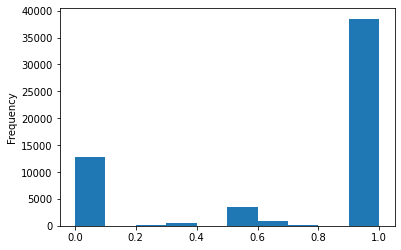

In [109]:
# Plot the distribution of the user_question_accuracy
user_question_accuracy.user_ques_acc.plot.hist()
plt.show()

**Takeaways: when an exsiting user answers an old question**
1. The `user_question_accuracy` will be the best predictor when predicting an exsiting user answering an old question. 

### Compute the new feature - user_part_accuracy
- The average accuracy when a user answer questions in each Part

In [113]:
# Compute the accuracy when a user answer an question
user_part_accuracy = df.groupby(['user_id', 'part']).answered_correctly\
                        .mean().to_frame().reset_index()

# Rename the 3rd column
user_part_accuracy.rename(columns={'answered_correctly': 'user_part_acc'}, inplace=True)

# Print 5 random samples
user_part_accuracy.sample(5)

,user_id,part,user_part_acc
158,1637273633,7.0,0.683761
60,775113212,4.0,0.666667
94,1233875513,5.0,0.734815
56,706626847,7.0,0.700000
42,555691277,3.0,0.500000


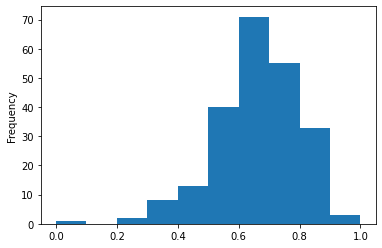

In [114]:
# Plot the distribution of the user_part_accuracy
user_part_accuracy.user_part_acc.plot.hist()
plt.show()

### Compute the new feature - user_bundle_accuracy
- The average accuracy when a user answer the questions in a bundle

In [115]:
# Compute the accuracy when a user answer an question
user_bundle_accuracy = df.groupby(['user_id', 'bundle_id']).answered_correctly\
                        .mean().to_frame().reset_index()

# Rename the 3rd column
user_bundle_accuracy.rename(columns={'answered_correctly': 'user_bundle_acc'}, inplace=True)

# Print 5 random samples
user_bundle_accuracy.sample(5)

,user_id,bundle_id,user_bundle_acc
2810,554169193,2758.0,1.0
29976,2002570769,1154.0,1.0
20814,1364159702,1321.0,1.0
21338,1364159702,4679.0,0.5
27730,1838324752,5120.0,1.0


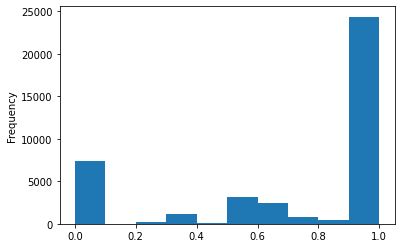

In [116]:
# Plot the distribution of the user_bundle_accuracy
user_bundle_accuracy.user_bundle_acc.plot.hist()
plt.show()

### Compute the new feature - user_tags_accuracy
- The average accuracy when a user answer the questions in a tag

In [117]:
# Compute the accuracy when a user answer an question
user_tags_accuracy = df.groupby(['user_id', 'tags']).answered_correctly\
                        .mean().to_frame().reset_index()

# Rename the 3rd column
user_tags_accuracy.rename(columns={'answered_correctly': 'user_tags_acc'}, inplace=True)

# Print 5 random samples
user_tags_accuracy.sample(5)

,user_id,tags,user_tags_acc
6580,1310228392,148 32 38 92,0.5
6802,1310228392,80 162,1.0
6337,1310228392,106 169 162 38,1.0
726,319060572,106 126 29,1.0
11635,1900527744,18 0 146 11 122,1.0


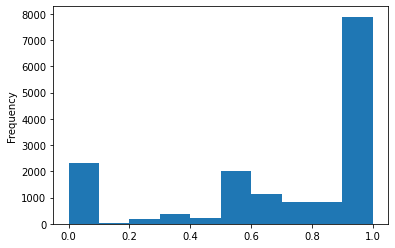

In [118]:
# Plot the distribution of the user_part_accuracy
user_tags_accuracy.user_tags_acc.plot.hist()
plt.show()

### Compute the new feature - user_tagcount_accuracy
- The average accuracy when a user answer the questions with certain number of tags

In [120]:
# Compute the accuracy when a user answer an question
user_tagcount_accuracy = df.groupby(['user_id', 'tag_count']).answered_correctly\
                            .mean().to_frame().reset_index()

# Rename the 3rd column
user_tagcount_accuracy.rename(columns={'answered_correctly': 'user_tagcount_acc'}, inplace=True)

# Print 5 random samples
user_tagcount_accuracy.sample(5)

,user_id,tag_count,user_tagcount_acc
40,674533997,5.0,0.691729
24,385471210,5.0,0.500000
117,1364159702,5.0,0.840726
122,1468996389,1.0,0.678082
35,555691277,6.0,1.000000


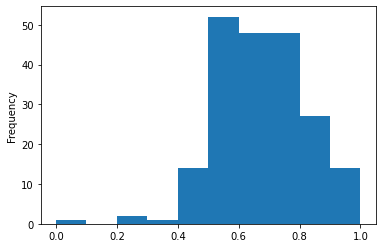

In [121]:
# Plot the distribution of the user_tagcount_accuracy
user_tagcount_accuracy.user_tagcount_acc.plot.hist()
plt.show()

**Takeaways: when an existing user answers a new questions:**
1. The best predictor is `user_bundle_acc`.
2. The next one is `user_tags_acc`.
3. The last two are `user_part_acc` and `user_tagcount_acc`.

### Compute new features - ques_acc

In [128]:
ques_acc = df.groupby()

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,user_ques_acc,user_bundle_acc,user_part_acc,user_tags_acc,user_tagcount_acc
29481,76909121,3459574905,1637273633,5729,2454,1,8000.0,True,5729.0,5729.0,5.0,8,1.0,1.0,1.0,0.668790,0.745902,0.671523
46635,94350823,6200098233,2002570769,5729,1897,1,43000.0,True,5729.0,5729.0,5.0,8,1.0,1.0,1.0,0.750495,0.785965,0.774775
53302,61542956,17833251450,1305988022,5729,2435,0,49000.0,True,5729.0,5729.0,5.0,8,1.0,0.0,0.0,0.633091,0.607383,0.633528
69217,89441688,7219268571,1900527744,5729,364,0,62000.0,True,5729.0,5729.0,5.0,8,1.0,0.0,0.0,0.526846,0.473684,0.534810


### Merge the new features with the train dataset

In [112]:
# Concat the user_ques_acc to the df
df = df.merge(user_question_accuracy, how='left', 
              left_on = ['user_id', 'content_id'], 
              right_on = ['user_id', 'content_id'])

# Print 5 random samples of the new dataset
df.sample(5)

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,user_ques_acc
44308,94348450,853521864,2002570769,1610,350,0,30000.0,True,1610.0,1610.0,3.0,106 38 81,3.0,0.0
32312,31434656,297592875,674533997,10741,429,0,31667.0,True,10741.0,10740.0,4.0,113 92 3,3.0,0.0
6754,64178114,570370911,1364159702,1866,458,1,33666.0,True,1866.0,1865.0,3.0,161 81 92,3.0,0.5
24427,58190218,1479405457,1233875513,9856,1159,0,61000.0,True,9856.0,9856.0,5.0,53,1.0,0.5
27467,76907100,1366478811,1637273633,5013,769,1,30000.0,True,5013.0,5013.0,5.0,26,1.0,1.0


In [122]:
# Concat the user_bundle_acc to the df
df = df.merge(user_bundle_accuracy, how='left', 
              left_on = ['user_id', 'bundle_id'], 
              right_on = ['user_id', 'bundle_id'])

# Print 5 random samples of the new dataset
df.sample(5)

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,user_ques_acc,user_bundle_acc
56118,61721097,2089922174,1310228392,5347,833,0,17000.0,True,5347.0,5347.0,5.0,166,1.0,0.5,0.5
65226,98686804,69271625813,2093197291,7529,5157,1,10000.0,True,7529.0,7528.0,7.0,118 184 21,3.0,1.0,1.0
61913,98683464,2527476417,2093197291,7164,3086,0,31500.0,True,7164.0,7164.0,7.0,145 37 21,3.0,0.0,0.5
4850,25929319,12065848043,554169193,877,4114,1,16000.0,True,877.0,877.0,2.0,143 140 6 38 92,5.0,1.0,1.0
27225,76906845,816774165,1637273633,10455,556,1,24000.0,True,10455.0,10455.0,1.0,131 111 102,3.0,1.0,1.0


In [123]:
# Concat the user_part_acc to the df
df = df.merge(user_part_accuracy, how='left', 
              left_on = ['user_id', 'part'], 
              right_on = ['user_id', 'part'])

# Print 5 random samples of the new dataset
df.sample(5)

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,user_ques_acc,user_bundle_acc,user_part_acc
66179,86354432,1223725191,1838324752,7985,107,1,10000.0,True,7985.0,7985.0,5.0,116,1.0,1.0,1.0,0.529762
34385,54165016,15145216657,1148874033,10469,561,1,21000.0,True,10469.0,10469.0,1.0,51 131 29,3.0,1.0,1.0,0.878317
22013,95092091,605068890,2018567473,5255,55,0,32000.0,True,5255.0,5255.0,5.0,28,1.0,0.5,0.5,0.725240
64433,98686000,68419655172,2093197291,8302,4690,0,31000.0,True,8302.0,8302.0,5.0,53,1.0,0.0,0.0,0.707270
36865,54167523,40347004789,1148874033,1348,2697,1,19000.0,True,1348.0,1348.0,2.0,143 105 81 92,4.0,1.0,1.0,0.751244


In [124]:
# Concat the user_tags_acc to the df
df = df.merge(user_tags_accuracy, how='left', 
              left_on = ['user_id', 'tags'], 
              right_on = ['user_id', 'tags'])

# Print 5 random samples of the new dataset
df.sample(5)

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,user_ques_acc,user_bundle_acc,user_part_acc,user_tags_acc
40350,54171027,56737490154,1148874033,2068,5360,1,29666.0,True,2068.0,2066.0,3.0,82 38 102,3.0,1.000000,1.000000,0.735259,0.758621
42421,54173178,73199016994,1148874033,12222,6605,1,19000.0,True,12222.0,12222.0,2.0,90 100 38 29,4.0,1.000000,1.000000,0.751244,0.766667
7870,64179258,3441613390,1364159702,2546,1283,1,19000.0,True,2546.0,2545.0,3.0,136 92 29,3.0,1.000000,0.666667,0.745829,0.611111
54551,61544226,27535198324,1305988022,12264,3706,0,37000.0,True,12264.0,12264.0,2.0,155 119 81 92,4.0,0.333333,0.333333,0.671763,0.666667
1493,25925859,1500769873,554169193,6842,752,1,25500.0,True,6842.0,6841.0,6.0,1,1.0,1.000000,0.625000,0.736000,0.660194


In [125]:
# Concat the user_tags_acc to the df
df = df.merge(user_tagcount_accuracy, how='left', 
              left_on = ['user_id', 'tag_count'], 
              right_on = ['user_id', 'tag_count'])

# Print 5 random samples of the new dataset
df.sample(5)

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tags,tag_count,user_ques_acc,user_bundle_acc,user_part_acc,user_tags_acc,user_tagcount_acc
44138,94348279,548663900,2002570769,2667,227,1,28333.0,True,2667.0,2665.0,4.0,82 158 102,3.0,1.0,0.666667,0.845732,1.000000,0.849925
52176,61541806,6511096336,1305988022,6125,1285,1,46000.0,True,6125.0,6125.0,5.0,108,1.0,1.0,1.000000,0.633091,0.428571,0.633528
63979,98685539,68178556672,2093197291,9151,4398,1,14000.0,True,9151.0,9151.0,5.0,60,1.0,1.0,1.000000,0.707270,0.722222,0.742956
11988,64183415,16810451435,1364159702,10614,4279,1,25000.0,True,10614.0,10614.0,1.0,10 70 29,3.0,1.0,1.000000,0.894737,1.000000,0.794591
4673,25929141,11574523700,554169193,8296,3936,1,13000.0,True,8296.0,8296.0,5.0,1,1.0,1.0,1.000000,0.645957,0.660194,0.654257
